In [1]:
import pandas as pd
import numpy as np
data_train = pd.read_csv('/Users/haixiangliu/Documents/Titanic/train.csv')
data_test = pd.read_csv('/Users/haixiangliu/Documents/Titanic/test.csv')

In [2]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


#### PassengerId => 乘客ID     
Pclass => 乘客等级(1/2/3等舱位)       
SibSp => 堂兄弟/妹个数         
Parch => 父母与小孩个数  
Ticket => 船票信息               
Fare => 票价              
Cabin => 客舱             
Embarked => 登船港口

In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


由info可得：

1、data_train数据中总共有891数据

其中Age有177条缺失值(891-714)；Cabin有687条缺失值(891-204)，缺失比较严重；Embarked有2条缺失值(891-889)

2、data_test数据中总共有418条数据

其中Age缺失86条数据，Cabin缺失327条数据，Fare缺失1条数据

In [7]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


结论：

1、大概38%左右的人最后获救

2、Pclass中2、3船舱的人要比1多

3、大多数乘客没有携带家属


In [490]:
np.percentile(data_train['Fare'],99) #购买512船票人数不超过1%

249.00622000000033

In [416]:
#离散类型数据分布
data_train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sdycoff, Mr. Todor",male,347082,G6,S
freq,1,577,7,4,644


结论：

1、Name属性是唯一，没有重名

2、性别就男和女

3、Ticket不是唯一的，891名乘客只有681张船票，说明可能有的是和亲人共用一张船票的

4、登录港口是3个

### 离散型特征与Survived之间的关联性

In [417]:
#pclass和survived的关系
data_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by = 'Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


 结论：Pclass数值越小，获救的几率越大

In [418]:
#sex和survived的关系
data_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


结论：女性的获救几率高于男性 

In [419]:
#sibsp和survived的关系
data_train[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


结论：兄弟姐妹的个数和获救没有明显的关联

In [420]:
#parch和survived的关系
data_train[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by = 'Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


结论：父母子女个数似乎与Survived之间也没有明显的关联 

In [421]:
#embarked和survived的关系
data_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


结论：登陆港口C的获救概率高于Q和S

### 连续型特征与Survived之间的关联性

In [422]:
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as ply

<module 'matplotlib' from '/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py'>

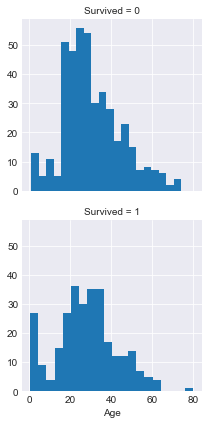

In [423]:
#Aage和Survived的关系直方图
grid = sns.FacetGrid(data_train,'Survived')
grid.map(ply.hist,'Age',bins=20)
sns.set_style('darkgrid')#设置背景
plt
#15-30存活率小，80存活，age<4存活率较高

<module 'matplotlib' from '/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py'>

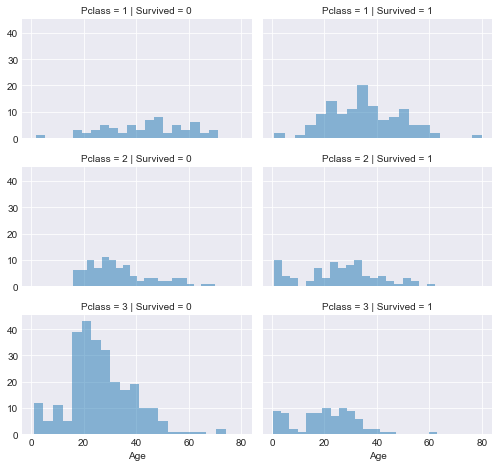

In [424]:
#Age/Pclass和Survived
grid =sns.FacetGrid(data_train,'Pclass','Survived',size=2.2,aspect=1.6)
grid.map(ply.hist, 'Age', alpha=0.5, bins=20)
sns.set_style('darkgrid')
plt


Pclass=1中大部分乘客都存活下来了

Pclass=2和Pclass=3中婴儿的存活概率较高

Pclass=3的乘客最多，但是大部分都没有存活下下来


/usr/local/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


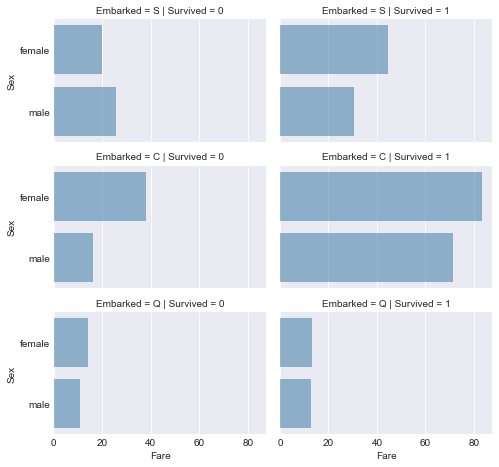

In [473]:
grid = sns.FacetGrid(data_train,row='Embarked',col='Survived',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Fare','Sex',alpha=0.5,ci=None)
sns.set_style('darkgrid')

票价越高存活率越大

Embarked=C中男性的存活率比较高，但可能与Pclass的特征相关


Text(0,0.5,'人数')

<Figure size 432x288 with 0 Axes>

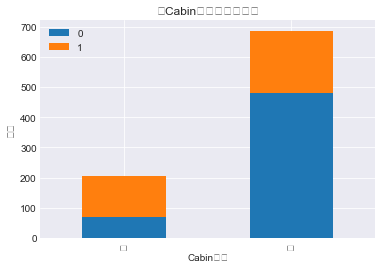

In [474]:
fig = ply.figure()
fig.set(alpha=0.2)
Survived_cabin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocabin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
ply.title('按Cabin有无看获救情况')
ply.xlabel('Cabin有无') 
ply.ylabel('人数')

有Cabin的似乎获救的概率要高一点


In [427]:
data_train['Name'].replace(['Lady', 'Countess', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare').replace('Mlle', 'Miss').replace('Ms', 'Miss').replace('Mme', 'Mrs')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
5                                       Moran, Mr. James
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
17                          Wil

In [428]:
N_array=[]
for i in  data_train['Name']:
    if 'Rare' in i:
        N_array.append('Rare')
    elif 'Miss' in i:
        N_array.append('Miss')
    elif 'Mrs' in i:
        N_array.append('Mrs')
    elif 'Master' in i:
        N_array.append('Master')
    elif 'Mr' in i:
        N_array.append('Mr')
    else:
        N_array.append('Capt')
data_train['Title'] = N_array

In [429]:
N_array1=[]
for i in  data_test['Name']:
    if 'Rare' in i:
        N_array1.append('Rare')
    elif 'Miss' in i:
        N_array1.append('Miss')
    elif 'Mrs' in i:
        N_array1.append('Mrs')
    elif 'Master' in i:
        N_array1.append('Master')
    elif 'Mr' in i:
        N_array1.append('Mr')
    else:
        N_array1.append('Capt')
data_test['Title'] = N_array1

In [430]:
data_train['Title'] = data_train['Title'].map({'Capt':0,'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}).astype(int)
data_test['Title'] = data_test['Title'].map({'Capt':0,'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}).astype(int)

In [431]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [432]:
#将性别转换成数字
data_train['Sex'] = data_train['Sex'].map({'female':1,'male':0}).astype(int)
data_test['Sex'] = data_test['Sex'].map({'female':1,'male':0}).astype(int)

In [433]:
# 使用平均年龄来填充年龄中的nan值
data_train['Age'].fillna(data_train['Age'].mean(),inplace=True)
data_test['Age'].fillna(data_test['Age'].mean(),inplace=True)
#data_test['Fare'].fillna(data_test['Fare'].mean(),inplace=True)

In [434]:
# 使用登录最多的港口来填充登录港口的nan值
print(data_train['Embarked'].value_counts())
data_train['Embarked'].fillna('S',inplace=True)
data_test['Embarked'].fillna('S',inplace=True)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [435]:
#Fare缺失，用中位数来填充
data_test['Fare'].fillna(data_test['Fare'].dropna().median(), inplace=True)

In [436]:
data_train['Embarked'] = data_train['Embarked'].map({'S':0,'C':1,'Q':2})
data_test['Embarked'] = data_test['Embarked'].map({'S':0,'C':1,'Q':2})

In [437]:
#Cabin属性简单的做有无处理
data_train.Cabin[data_train.Cabin.notnull()]=1
data_train.Cabin[data_train.Cabin.isnull()]=0
data_test.Cabin[data_test.Cabin.notnull()]=1
data_test.Cabin[data_test.Cabin.isnull()]=0


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/

In [438]:
df = data_train['Ticket'].value_counts()
df = pd.DataFrame(df)
df = df[df['Ticket']>1]
#共享船票的票号
df_ticket = df.index.values
#所有船票
tickets = data_train.Ticket.values
result=[]
for ticket in tickets:
    if ticket in df_ticket:
        ticket=1
    else:
        ticket=0    #共享是1，非共享是0
    result.append(ticket)
results = pd.DataFrame(result)
results.columns=['Ticket_Count']
data_train = pd.concat([data_train,results],axis=1)

In [439]:
df1 = data_test['Ticket'].value_counts()
df1 = pd.DataFrame(df)
df1 = df1[df1['Ticket']>1]
#共享船票的票号
df1_ticket = df1.index.values
#所有船票
tickets1 = data_test.Ticket.values
result1=[]
for ticket1 in tickets1:
    if ticket1 in df1_ticket:
        ticket1=1
    else:
        ticket1=0    #共享是1，非共享是0
    result1.append(ticket1)
results1 = pd.DataFrame(result1)
results1.columns=['Ticket_Count']
data_test = pd.concat([data_test,results1],axis=1)

In [440]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Count
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0


In [441]:
data_train['FamilySize'] = data_train['SibSp']+data_train['Parch']+1

In [442]:
data_train['FamilySizePlus']=0

In [443]:
data_test['FamilySize'] = data_test['SibSp']+data_train['Parch']+1
data_test['FamilySizePlus']=0

In [444]:
F_array=[]
F_array1=[]

In [445]:
for i in data_train['FamilySize']:
   # print(i)
    if 1<i<5:
        F_array.append(2)
    else:
        F_array.append(1)
data_train['FamilySizePlus']=F_array
for i in data_test['FamilySize']:
   # print(i)
    if 1<i<5:
        F_array1.append(2)
    else:
        F_array1.append(1)
data_test['FamilySizePlus']=F_array1

In [446]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Count,FamilySize,FamilySizePlus
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1,0,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,3,0,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,2,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,3,1,2,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1,0,1,1


In [447]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_Count,FamilySize,FamilySizePlus
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,2,1,0,1.0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,0,3,0,2.0,2
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,2,1,0,1.0,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,0,1,0,1.0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,0,3,0,2.0,2


### 数据准备

In [449]:
#把不需要的数据特征丢掉
data_train=data_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize'], axis=1)
data_test_A = data_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'FamilySize'], axis=1)


In [450]:
#选取各数据对应的特征
X_train= data_train[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin',  'Title','FamilySizePlus', 'Ticket_Count']]
Y_train=data_train['Survived']
X_test = data_test_A


In [452]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)

In [455]:
from sklearn.svm import SVC, LinearSVC
# Support Vector Machines
svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(logreg.score(X_train,Y_train)*100,2)

# linearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [457]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [458]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest=round(random_forest.score(X_train,Y_train)*100,2)

In [459]:
#  k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [462]:
models = pd.DataFrame({'Model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',  
              'Linear SVC', 'Decision Tree'],
                      'score':[acc_svc,acc_knn,acc_log,acc_random_forest,acc_linear_svc,acc_decision_tree]})

In [463]:
models

,Model,score
0,Support Vector Machines,82.04
1,KNN,84.96
2,Logistic Regression,82.04
3,Random Forest,96.97
4,Naive Bayes,76.09
5,Linear SVC,65.43
6,Decision Tree,98.77


### 各特征值的重要性

In [466]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['importance'] = random_forest.feature_importances_
features

,Feature,importance
0,Pclass,0.086598
1,Sex,0.142853
2,Age,0.228929
3,Fare,0.250453
4,Embarked,0.035417
5,Cabin,0.051216
6,Title,0.152231
7,FamilySizePlus,0.035883
8,Ticket_Count,0.016420


### 模型调参

In [467]:
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import GridSearchCV
forest = RandomForestClassifier(max_features='sqrt') #最佳分割的特征数量，和默认一样
parameter_grid = {'max_depth':[4,5,6,7,8],'n_estimators':[100,200,250,500],'criterion':['gini','entropy']} #c...测量分割质量
cross_validation= StratifiedKFold(Y_train,n_folds=5)
grid_search=GridSearchCV(forest,param_grid=parameter_grid,cv = cross_validation)
grid_search.fit(X_train,Y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

/usr/local/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Best score: 0.8361391694725028
Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 250}


### 结果预测

In [468]:
random_forest = RandomForestClassifier(n_estimators = 250,max_depth=8,criterion='gini')
random_forest.fit(X_train,Y_train)
Y_pred = random_forest.predict(X_test)

In [471]:
last_result = pd.DataFrame({
        "PassengerId": data_test["PassengerId"],
        "Survived": Y_pred
    })

In [472]:
last_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
